In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from datetime import date
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.utils import resample
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler, RobustScaler,MaxAbsScaler
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from xgboost import plot_importance
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
train = pd.read_csv('/Users/fiona/Documents/Tunis/Train_v2.csv')
test = pd.read_csv('/Users/fiona/Documents/Tunis/Test_v2.csv')

In [3]:
train.shape

(23524, 13)

In [4]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [5]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
train['year'] = train['year'].astype(str)

In [8]:
train['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [9]:
train['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [10]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [11]:
train['bank_account'] = train['bank_account'].map({'Yes': 1, 'No': 0})

In [12]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [13]:
#train['education_level'] = train['education_level'].map({'Other/Dont know/RTA': "Low", 'No formal education': 'Low',
                                                        #'Primary education':'Middle', 'Secondary education':'Middle',
                                                        #'Tertiary education':'High','Vocational/Specialised training':'High'})

In [14]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [15]:
#train['job_type'] = train['job_type'].map({'Dont Know/Refuse to answer': "Unemployed", 'No Income': 'Unemployed',
                                            #'Informally employed':'Employed', 'Formally employed Private':'Employed',
                                            #'Formally employed Government':'Employed','Farming and Fishing':'Self employed',
                                          #'Remittance Dependent':'Government Dependent','Other Income':'Self employed',
                                          #'Self employed':'Self employed','Government Dependent':'Government Dependent'})

In [16]:
train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [17]:
#train['marital_status'] = train['marital_status'].map({'Married/Living together': 'Married', 'Single/Never Married': 'Single',
                                                      #'Widowed':'Widowed','Divorced/Seperated':'Divorced','Dont know':'Single'})

In [18]:
table1 = pd.crosstab(train["uniqueid"],train["bank_account"])
#table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(8314.291972741916, 0.9993654501535805, 8734, array([[3.43683047, 0.56316953],
        [3.43683047, 0.56316953],
        [3.43683047, 0.56316953],
        ...,
        [3.43683047, 0.56316953],
        [3.43683047, 0.56316953],
        [3.43683047, 0.56316953]]))

(837.961907796301,
 2.5290257400600255e-181,
 3,
 array([[5213.67182452,  854.32817548],
        [7505.17854106, 1229.82145894],
        [5687.95442952,  932.04557048],
        [1805.1952049 ,  295.8047951 ]]))

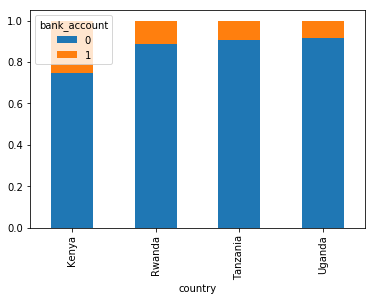

In [19]:
table1 = pd.crosstab(train["country"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(837.961907796301,
 2.5290257400600255e-181,
 3,
 array([[5213.67182452,  854.32817548],
        [7505.17854106, 1229.82145894],
        [5687.95442952,  932.04557048],
        [1805.1952049 ,  295.8047951 ]]))

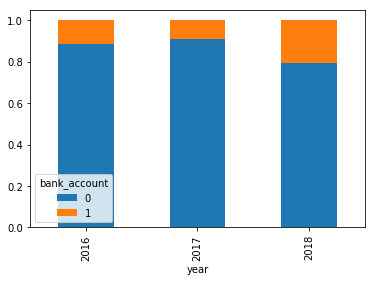

In [20]:
table = pd.crosstab(train["year"],train["bank_account"])
table.div(table.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(178.72103113792548,
 9.218844615938627e-41,
 1,
 array([[12323.61486142,  2019.38513858],
        [ 7888.38513858,  1292.61486142]]))

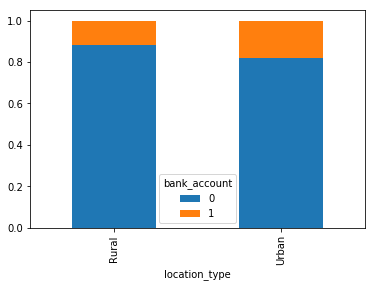

In [21]:
table1 = pd.crosstab(train["location_type"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(1032.7610839461552,
 1.3592541989722424e-226,
 1,
 array([[ 5215.39023976,   854.60976024],
        [14996.60976024,  2457.39023976]]))

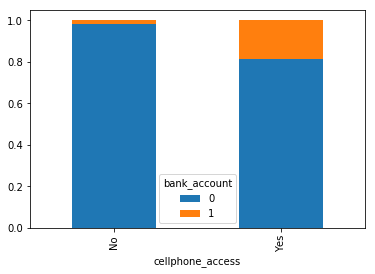

In [22]:
table1 = pd.crosstab(train["cellphone_access"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(322.62384989978455,
 3.884875437093037e-72,
 1,
 array([[11923.22411155,  1953.77588845],
        [ 8288.77588845,  1358.22411155]]))

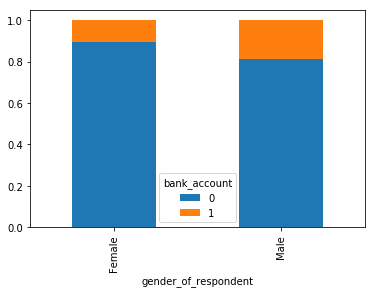

In [23]:
table1 = pd.crosstab(train["gender_of_respondent"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(327.90665554178617,
 9.9629019270655e-69,
 5,
 array([[ 1915.17377997,   313.82622003],
        [11024.49294338,  1806.50705662],
        [  163.24944737,    26.75055263],
        [  573.95068866,    94.04931134],
        [  933.09947288,   152.90052712],
        [ 5602.03366774,   917.96633226]]))

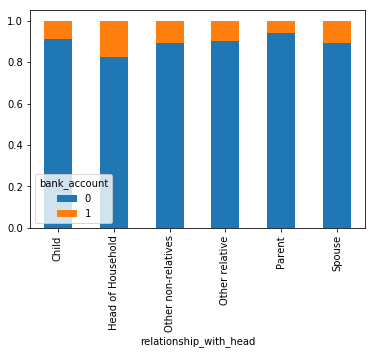

In [24]:
table1 = pd.crosstab(train["relationship_with_head"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(193.29187150436812,
 1.03957918709173e-40,
 4,
 array([[1.78371501e+03, 2.92284986e+02],
        [6.87366094e+00, 1.12633906e+00],
        [9.23562268e+03, 1.51337732e+03],
        [6.85905441e+03, 1.12394559e+03],
        [2.32673423e+03, 3.81265771e+02]]))

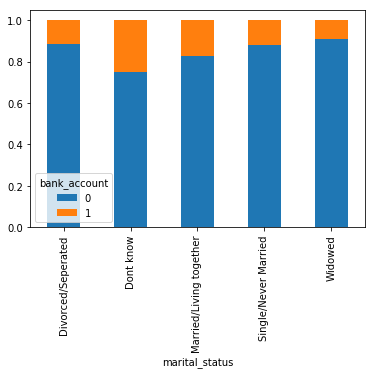

In [25]:
table1 = pd.crosstab(train["marital_status"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(3549.125449633797, 0.0, 5, array([[3.87932239e+03, 6.35677606e+02],
        [3.00722666e+01, 4.92773338e+00],
        [1.09901246e+04, 1.80087536e+03],
        [3.62843377e+03, 5.94566230e+02],
        [9.94103214e+02, 1.62896786e+02],
        [6.89943717e+02, 1.13056283e+02]]))

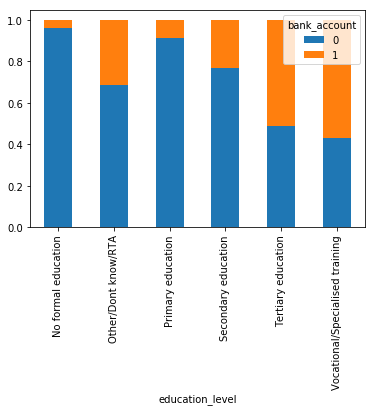

In [26]:
table1 = pd.crosstab(train["education_level"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

(3032.254227408195, 0.0, 9, array([[ 108.26015984,   17.73984016],
        [4674.94864819,  766.05135181],
        [ 332.51334807,   54.48665193],
        [ 906.46403673,  148.53596327],
        [ 212.22428158,   34.77571842],
        [4808.98503656,  788.01496344],
        [ 538.72317633,   88.27682367],
        [ 927.94422717,  152.05577283],
        [2171.21765006,  355.78234994],
        [5530.71943547,  906.28056453]]))

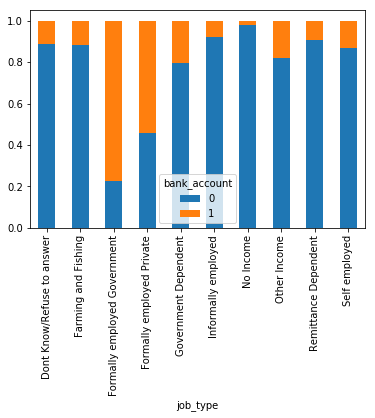

In [27]:
table1 = pd.crosstab(train["job_type"],train["bank_account"])
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
stats.chi2_contingency(table1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a217458d0>]],
      dtype=object)

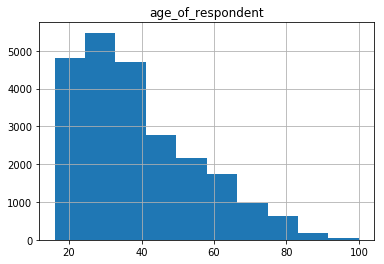

In [28]:
train.hist(column = 'age_of_respondent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21c393c8>]],
      dtype=object)

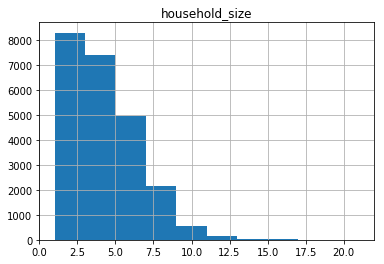

In [29]:
train.hist(column = 'household_size') 

In [30]:
stats.ttest_ind(train['household_size'], train['bank_account'])

Ttest_indResult(statistic=248.7561427232822, pvalue=0.0)

In [52]:
transformer = FunctionTransformer(np.log1p, validate=True)
train['age_of_respondent'] = transformer.fit_transform(train.age_of_respondent.values.reshape(-1, 1)) #same output
train['household_size'] = transformer.fit_transform(train.household_size.values.reshape(-1, 1)) #same output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2182c400>]],
      dtype=object)

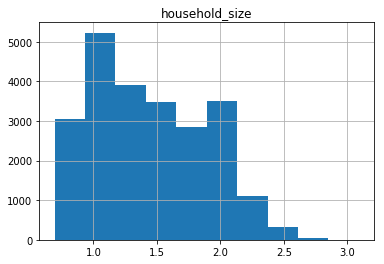

In [53]:
train.hist(column = 'household_size') 

In [54]:
new_train = train.drop(columns = ['uniqueid'])

In [55]:
#Predict using catboost without balancing the dataset 
x = new_train.loc[:, new_train.columns != "bank_account"]
y = new_train.loc[:, new_train.columns == "bank_account"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [57]:
categorical_features = np.where(x_train.dtypes != np.float)[0]

In [173]:
model=CatBoostClassifier(iterations=2500, depth=7, learning_rate=0.1, loss_function='Logloss', eval_metric = 'F1', od_type = 'Iter', od_wait= 40)

In [174]:
model.fit(x_train, y_train, categorical_features,eval_set=(x_test, y_test),plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [175]:
print(model.get_feature_importance(prettified = True))

             Feature Index  Importances
0         cellphone_access    32.304529
1          education_level    19.513706
2        age_of_respondent    11.094086
3                  country     8.495322
4                 job_type     8.054076
5                     year     6.237212
6            location_type     6.210122
7   relationship_with_head     3.016045
8     gender_of_respondent     2.665783
9           marital_status     1.274358
10          household_size     1.134762


In [176]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,y_pred,new_uniqueid
0,Kenya,2018,uniqueid_6056,Urban,Yes,0.396088,0.499654,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1.0,uniqueid_6056 x Kenya
1,Kenya,2018,uniqueid_6060,Urban,Yes,0.445776,0.513171,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1.0,uniqueid_6060 x Kenya
2,Kenya,2018,uniqueid_6065,Rural,No,0.396088,0.522193,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.0,uniqueid_6065 x Kenya
3,Kenya,2018,uniqueid_6072,Rural,No,0.438000,0.506635,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.0,uniqueid_6072 x Kenya
4,Kenya,2018,uniqueid_6073,Urban,No,0.396088,0.480029,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.0,uniqueid_6073 x Kenya


In [177]:
#test['education_level'] = test['education_level'].map({'Other/Dont know/RTA': "Low", 'No formal education': 'Low',
                                                        #'Primary education':'Middle', 'Secondary education':'Middle',
                                                        #'Tertiary education':'High','Vocational/Specialised training':'High'})

In [178]:
#test['job_type'] = test['job_type'].map({'Dont Know/Refuse to answer': "Unemployed", 'No Income': 'Unemployed',
                                            #'Informally employed':'Employed', 'Formally employed Private':'Employed',
                                            #'Formally employed Government':'Employed','Farming and Fishing':'Self employed',
                                          #'Remittance Dependent':'Government Dependent','Other Income':'Self employed',
                                          #'Self employed':'Self employed','Government Dependent':'Government Dependent'})

In [179]:
#test['marital_status'] = test['marital_status'].map({'Married/Living together': 'Married', 'Single/Never Married': 'Single',
                                                      #'Widowed':'Widowed','Divorced/Seperated':'Divorced','Dont know':'Single'})

In [180]:
transformer = FunctionTransformer(np.log1p, validate=True)
test['age_of_respondent'] = transformer.fit_transform(test.age_of_respondent.values.reshape(-1, 1)) #same output
test['household_size'] = transformer.fit_transform(test.household_size.values.reshape(-1, 1)) #same output

In [181]:
test['year'] = test['year'].astype(str)

In [182]:
new_test = test.drop(columns = ['uniqueid','new_uniqueid'])

In [183]:
new_test.dtypes

country                    object
year                       object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
y_pred                    float64
dtype: object

In [184]:
test['y_pred'] = model.predict(new_test)

In [185]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,y_pred,new_uniqueid
0,Kenya,2018,uniqueid_6056,Urban,Yes,0.333674,0.405234,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1.0,uniqueid_6056 x Kenya
1,Kenya,2018,uniqueid_6060,Urban,Yes,0.368646,0.414208,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1.0,uniqueid_6060 x Kenya
2,Kenya,2018,uniqueid_6065,Rural,No,0.333674,0.420152,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.0,uniqueid_6065 x Kenya
3,Kenya,2018,uniqueid_6072,Rural,No,0.363253,0.409879,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.0,uniqueid_6072 x Kenya
4,Kenya,2018,uniqueid_6073,Urban,No,0.333674,0.392062,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.0,uniqueid_6073 x Kenya


In [186]:
test['new_uniqueid'] = test[['uniqueid', 'country']].apply(' x '.join, axis=1)

In [187]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,y_pred,new_uniqueid
0,Kenya,2018,uniqueid_6056,Urban,Yes,0.333674,0.405234,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1.0,uniqueid_6056 x Kenya
1,Kenya,2018,uniqueid_6060,Urban,Yes,0.368646,0.414208,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1.0,uniqueid_6060 x Kenya
2,Kenya,2018,uniqueid_6065,Rural,No,0.333674,0.420152,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.0,uniqueid_6065 x Kenya
3,Kenya,2018,uniqueid_6072,Rural,No,0.363253,0.409879,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.0,uniqueid_6072 x Kenya
4,Kenya,2018,uniqueid_6073,Urban,No,0.333674,0.392062,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.0,uniqueid_6073 x Kenya


In [188]:
test.to_csv("/Users/fiona/Documents/Tunis/prediction1.csv")

In [419]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

#selector = feature_selection.RFE(LogisticRegression())
numeric_transformer = Pipeline(steps=[('scaler', MaxAbsScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

clf = LogisticRegression()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfecv', RFECV(estimator=clf, scoring='accuracy'))])

In [420]:
pipe.fit(x_train, y_train)


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/a

/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None, steps=[('scaler', MaxAbsScaler(copy=True))]), Index(['household_size', 'age_of_respondent'], dtype='object')), ('cat'..._start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0))])

In [421]:
y_pred = pipe.predict(x_test)

In [422]:
from sklearn.metrics import classification_report

In [423]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.71      0.35      0.47       669

   micro avg       0.89      0.89      0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



In [410]:
test['y_pred'] = pipe.predict(new_test)

In [411]:
test['new_uniqueid'] = test[['uniqueid', 'country']].apply(' x '.join, axis=1)

In [412]:
test.to_csv("/Users/fiona/Documents/Tunis/prediction2.csv")

In [476]:
#Gradient Boosting
#Pipeline - One Hot Encoder
numeric_transformer = Pipeline(steps=[('scaler', MaxAbsScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

est = GradientBoostingClassifier()
    

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfecv', RFECV(estimator=est)),
                      ('gbm', est)])

gbm_hyperparams = {
    "gbm__learning_rate": [0.1, 0.01],
    "gbm__max_depth":[5,8],
    "gbm__n_estimators":[500, 1200]}

grid_search = GridSearchCV(pipe,
                          gbm_hyperparams,
                          cv=3,
                          n_jobs=1,
                          verbose=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500, score=0.8802805675115575, total= 1.5min
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500, score=0.8723098995695839, total= 1.8min
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=500, score=0.8791646739996811, total=551.0min
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200, score=0.8727881396461024, total= 1.9min
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200, score=0.866571018651363, total= 2.0min
[CV] gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=5, gbm__n_estimators=1200, score=0.8700781125458313, total= 1.9min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500 .


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500, score=0.8662521919336841, total= 1.9min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500 .


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500, score=0.8606727243743025, total= 2.0min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500 .


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=500, score=0.863860991551092, total= 2.0min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8637015781922525, total= 3.9min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8552526701737606, total= 2.8min
[CV] gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.1, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8576438705563526, total= 2.8min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500, score=0.8884106488123705, total= 1.5min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500, score=0.882831181252989, total= 1.7min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=500, score=0.8880918220946915, total= 1.6min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200, score=0.8877729953770126, total= 1.9min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200, score=0.8813964610234337, total= 1.9min
[CV] gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=5, gbm__n_estimators=1200, score=0.8879324087358521, total= 1.9min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500, score=0.8868165152239758, total= 1.8min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500, score=0.8805993942292364, total= 2.0min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=500, score=0.8877729953770126, total= 1.9min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8809182209469153, total= 2.5min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8745416865933365, total= 2.6min
[CV] gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  gbm__learning_rate=0.01, gbm__max_depth=8, gbm__n_estimators=1200, score=0.8805993942292364, total= 2.5min


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 600.2min finished
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None, steps=[('scaler', MaxAbsScaler(copy=True))]), Index(['household_size', 'age_of_respondent'], dtype='object')), ('cat'...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'gbm__learning_rate': [0.1, 0.01], 'gbm__max_depth': [5, 8], 'gbm__n_estimators': [500, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [477]:
print(grid_search.best_params_)

{'gbm__learning_rate': 0.01, 'gbm__max_depth': 5, 'gbm__n_estimators': 500}


In [478]:
y_pred = grid_search.predict(x_test)

In [479]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.70      0.34      0.46       669

   micro avg       0.89      0.89      0.89      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



In [480]:
test['y_pred'] = grid_search.predict(new_test)

In [481]:
test['new_uniqueid'] = test[['uniqueid', 'country']].apply(' x '.join, axis=1)

In [482]:
test.to_csv("/Users/fiona/Documents/Tunis/prediction3.csv")

In [501]:
#Pipeline - One Hot Encoder
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ("XGB", XGBClassifier())])

xgb_hyperparams = {'XGB__n_estimators': [2000,1500],
                   'XGB__learning_rate': [0.01, 0.02,0.03],
                   'XGB__max_depth': [5,4,7,8]}

fit_parameters = {'XGB__early_stopping_rounds': 5,
              'XGB__eval_metric': 'auc',
              'XGB__eval_set': [(x_test, y_test)],
              'XGB__verbose': False}

grid_search = GridSearchCV(pipe,
                          xgb_hyperparams,
                          cv=3,
                          n_jobs=1,
                          verbose=3)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8880918220946915, total=  24.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8837876614060258, total=  24.0s
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.7s remaining:    0.0s
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8880918220946915, total=  23.8s
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8877729953770126, total=  18.0s
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8837876614060258, total=  18.3s
[CV] XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8885700621712099, total=  17.8s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8871353419416547, total=  20.5s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8852223816355811, total=  20.4s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8885700621712099, total=  19.9s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8874541686593337, total=  15.1s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8847441415590627, total=  15.3s
[CV] XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8879324087358521, total=  15.4s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8857006217120995, total=  32.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8821935278176312, total=  32.1s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8864976885062968, total=  31.8s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8858600350709389, total=  24.4s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8820341144587917, total=  24.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8876135820181731, total=  24.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8839470747648653, total=  35.0s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8799617407938786, total=  36.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8852223816355811, total=  36.2s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8860194484297784, total=  27.6s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500, score=0.880439980870397, total=  27.3s
[CV] XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.01, XGB__max_depth=8, XGB__n_estimators=1500, score=0.88554120835326, total=  27.7s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000, score=0.88554120835326, total=  23.7s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000, score=0.879802327435039, total=  24.0s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8880918220946915, total=  23.4s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8871353419416547, total=  17.8s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8810776343057548, total=  17.8s
[CV] XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8884106488123705, total=  17.9s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8850629682767416, total=  20.4s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8825123545353101, total=  19.9s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8874541686593337, total=  20.0s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8864976885062968, total=  15.1s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8842659014825442, total=  15.1s
[CV] XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8885700621712099, total=  15.2s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000, score=0.882831181252989, total=  31.7s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8785270205643233, total=  31.9s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8837876614060258, total=  31.4s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8836282480471863, total=  24.0s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8805993942292364, total=  23.7s
[CV] XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8863382751474573, total=  23.5s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8796429140761995, total=  36.3s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8780487804878049, total=  35.7s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8786864339231628, total=  36.4s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8826717678941496, total=  27.4s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8790052606408417, total=  26.9s
[CV] XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.02, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8813964610234337, total=  27.3s
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8850629682767416, total=  23.6s
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8791646739996811, total=  24.1s
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=2000, score=0.8837876614060258, total=  22.7s
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8858600350709389, total=1300.5min
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8794835007173601, total=  19.1s
[CV] XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=5, XGB__n_estimators=1500, score=0.8864976885062968, total=  20.5s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8871353419416547, total=  20.8s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8815558743822732, total=  19.6s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=2000, score=0.8872947553004942, total=  19.4s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8868165152239758, total=  15.6s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8833094213295074, total=  15.3s
[CV] XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=4, XGB__n_estimators=1500, score=0.8869759285828153, total=  14.7s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8813964610234337, total=  30.7s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8764546468994102, total=  31.8s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=2000, score=0.8807588075880759, total=  31.2s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8825123545353101, total=  24.4s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8775705404112865, total=  24.0s
[CV] XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=7, XGB__n_estimators=1500, score=0.8826717678941496, total=  23.6s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000, score=0.877092300334768, total=  36.3s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8751793400286944, total=  36.3s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=2000, score=0.8769328869759286, total=  37.5s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8812370476645943, total=  27.5s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8754981667463734, total=  26.9s
[CV] XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500 


/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  XGB__learning_rate=0.03, XGB__max_depth=8, XGB__n_estimators=1500, score=0.8766140602582496, total=  26.1s


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 1332.1min finished
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fiona/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))]), Index(['household_size', 'age_of_respondent'...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'XGB__n_estimators': [2000, 1500], 'XGB__learning_rate': [0.01, 0.02, 0.03], 'XGB__max_depth': [5, 4, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [500]:
print(grid_search.best_params_)

{'XGB__learning_rate': 0.01, 'XGB__max_depth': 5, 'XGB__n_estimators': 1000}


In [492]:
y_pred = grid_search.predict(x_test)

In [493]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.70      0.35      0.47       669

   micro avg       0.89      0.89      0.89      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



In [494]:
test['y_pred'] = grid_search.predict(new_test)

In [495]:
test['new_uniqueid'] = test[['uniqueid', 'country']].apply(' x '.join, axis=1)

In [496]:
test.to_csv("/Users/fiona/Documents/Tunis/prediction4.csv")